###### Ian Wafer
###### 19/10/19

In [78]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as plt
sns.set(style='darkgrid')

# Shorten code to read the tips dataset
tips = sns.load_dataset('tips', delimiter=',')

To ensure the dataset loaded correctly we will print the first and last ten lines. 

In [82]:
# Show the first 10 lines of the dataset
print(tips.head(10), '\n')


# Show the last 10 lines of the dataset
print(tips.tail(10), '\n\n ---------------------New Column Layout---------------------')

# Clean up column headings
tips.columns = ['Total Bill ($)', 'Tip ($)', 'Sex', 'Smoker', 'Day', 'Time', 'Size']
print(tips.head(1), '\n')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2 

     total_bill   tip     sex smoker   day    time  size
234       15.53  3.00    Male    Yes   Sat  Dinner     2
235       10.07  1.25    Male     No   Sat  Dinner     2
236       12.60  1.00    Male    Yes   Sat  Dinner     2
237       32.83  1.17    Male    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
239       29.03  5.92    Male     No   Sat  Dinner     3
240  

Now that we have verified the dataset loaded correctly we can delve into the relationships within.

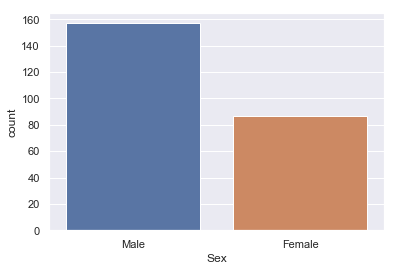

In [83]:
sns.countplot(x='Sex', data=tips)

Here we can see there is almost double the amount of males to females attending the restaurant. This would be important to conisder for sample sizing purposes but the dataset has a large enough sample from both sexes to continue the analysis and expect an accurate representation. 

***

The first relationship we will explore is between total bill and tip and determine if there is a trend

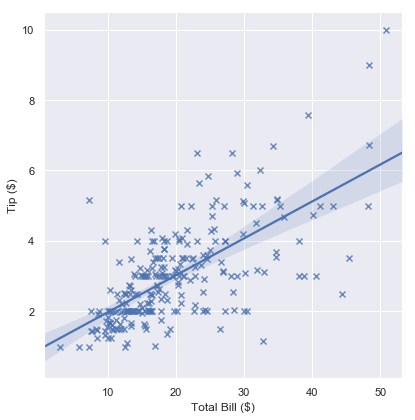

In [125]:
sns.pairplot(tips, x_vars=['Total Bill ($)'], y_vars=['Tip ($)'], kind='reg', markers='x', height=6)

From this graph we can see that the general trend for tipping amount increases with the total bill within certain limits with exceptions in certain cases. This verifies the expectation that tipping is usually done as a percentage of the total bill amount. 

***

Next we will look at breaking down this data further to determine relationships in greater depth. 

Below is a plot of the relationship of the above broken down into the time of day, divided by colour into the relevant sex the datapoints relate to with their sizes dictated by the size category of the dataset. 

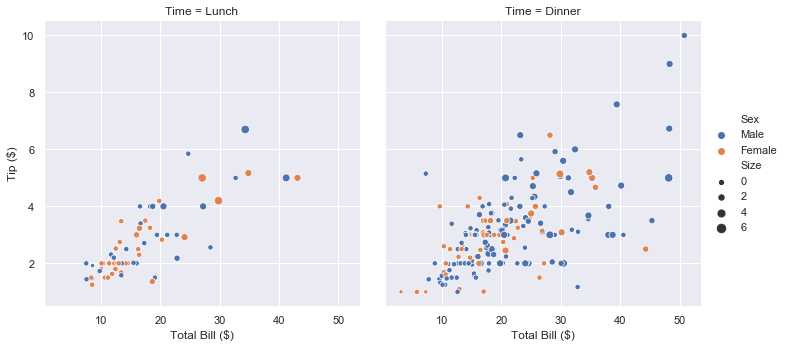

In [124]:
sns.relplot(x='Total Bill ($)', y='Tip ($)', hue='Sex', col='Time', data=tips, size='Size')

The above graphs show that there are far more dinners than lunches and that the dinner total bill is much more likely to be higher in value than the lunch bill. We can also see that the range between $10-40 total bills appear evenly split between the sexs while the higher total bills and therefore larger tips (due to the relationship shown earliar) has only the males present. This could also be due to the fact that male have twice the representation than females in this particular dataset. We can also see that the larger size tends to have a higher total bill. 

***

Below we look at the relationship between average, minimum and maximum tips between the sex and the size categories.

Average Tips By Sex
             Total Bill ($)  Tip ($)
Sex    Size                         
Male   1               8.58     1.92
       2              17.10     2.61
       3              24.29     3.48
       4              28.08     4.17
       5              30.12     3.75
       6              41.24     5.85
Female 1               6.80     1.28
       2              15.34     2.53
       3              21.55     3.25
       4              30.28     4.02
       5              29.85     5.14
       6              28.42     4.60 

Average Tip Percentage Of Total Bill
Sex     Size
Male    1       22.0
        2       15.0
        3       14.0
        4       15.0
        5       12.0
        6       14.0
Female  1       19.0
        2       16.0
        3       15.0
        4       13.0
        5       17.0
        6       16.0
dtype: float64 

Minimum Tips By Sex
Sex     Size
Male    1       1.92
        2       1.00
        3       1.66
        4       2.00
        5       2.00
   

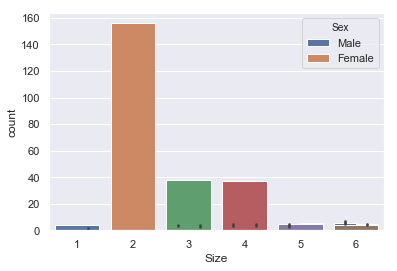

In [144]:
# Breakdown of categories of sex and size with respect to average total bill and tip amount

sexmean = tips.groupby(['Sex', 'Size']).mean()
print('Average Tips By Sex')
print(sexmean.round(2), '\n')
sns.barplot(x='Size', y='Tip ($)', hue='Sex', data=tips)

print('Average Tip Percentage Of Total Bill')
print(((sexmean['Tip ($)'] / sexmean['Total Bill ($)'])*100).round(0), '\n')


# Minimum tip size by sex and size of party
sexmin = tips.groupby(['Sex', 'Size'])['Tip ($)'].min()
print('Minimum Tips By Sex')
print(sexmin.round(2), '\n')

# Maximum tip size by sex and size of party
sexmax = tips.groupby(['Sex', 'Size'])['Tip ($)'].max()
print('Maximum Tips By Sex')
print(sexmax.round(2), '\n')

print('Difference Between Maximum & Minimum Tips')
print(sexmax-sexmin, '\n')

sns.countplot(x='Size', data=tips)

From the above we can see that as the group size increases so too does the average tip with the occasional anomaly. To determine if party size has an effect on the percentage of the bill tipped we need to look at the tip as a percentage of the total bill.

We can see that males and females of similar party size tip roughly the same percentage with females giving a slightly higher percentage than males as the party size increases. The percentage size trends towards roughly the same amount of 16% $\pm$5%. 

The difference between the minimum and maximum bills is very small or non existant at size 1, 5 and 6 for both sexs with a much greater differnce produced in the centre size values of 2, 3 and 4. This could be due to the small sample size attained for these sizes.

***

Next is to determine if there is any relationship in tip size with smokers. 

             Total Bill ($)  Tip ($)
Smoker Size                         
Yes    1               5.82     1.46
       2              17.96     2.71
       3              28.19     4.10
       4              30.61     3.99
       5              29.30     2.50
       6                NaN      NaN
No     1               8.66     1.42
       2              15.34     2.49
       3              21.01     3.07
       4              27.77     4.20
       5              30.58     5.05
       6              34.83     5.22 

 Average Tip Percentage Of Total Bill By Smoker 
Smoker  Size
Yes     1       25.0
        2       15.0
        3       15.0
        4       13.0
        5        9.0
        6        NaN
No      1       16.0
        2       16.0
        3       15.0
        4       15.0
        5       17.0
        6       15.0
dtype: float64


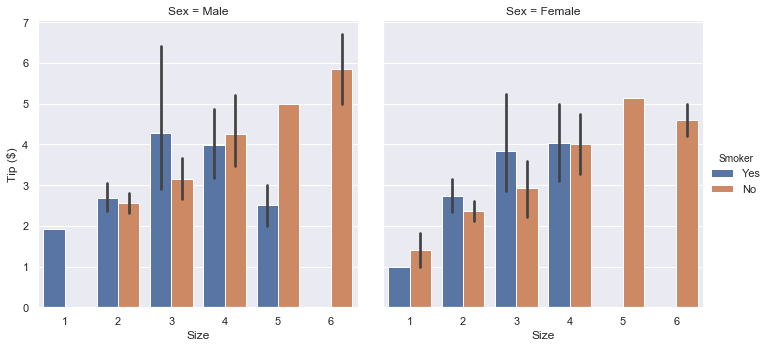

In [90]:
# Determine percentage of bill size that was tipped and round it to the closest whole number.

smokermean = tips.groupby(['Smoker', 'Size']).mean()
print(smokermean.round(2), '\n\n Average Tip Percentage Of Total Bill By Smoker ')

print(((smokermean['Tip ($)'] / smokermean['Total Bill ($)'])*100).round(0))

sns.catplot(x='Size', y='Tip ($)', hue='Smoker', col='Sex', data=tips, kind='bar')

From the above we can see very little difference in whether or not someone was a smoke with the exception of the size=1 column and a lack of data for smokers of party 6. Therefore from the clustered data in the centre we can conclude that smokers and non-smokers alike are likely to tip a similar amount. 

***



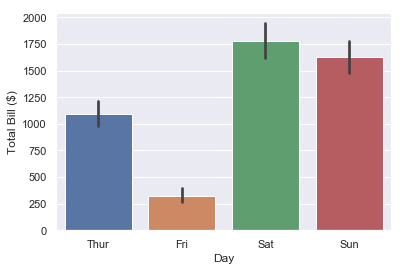

In [145]:
sns.barplot(x="Day", y="Total Bill ($)", data=tips, estimator=sum)

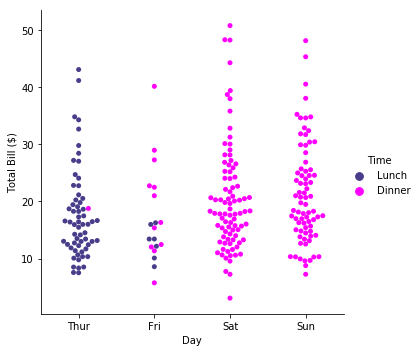

In [26]:
sns.catplot(x='Day', y='Total Bill ($)', hue='Time', palette=['darkslateblue', 'magenta'], kind='swarm', data=tips)

Source-https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700 accessed 2/11/2019
       https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ accessed 2/11/2019
       https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts accessed 2/11/2019
       https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html accessed 2/11/2019
       https://seaborn.pydata.org/tutorial.html accessed 11/11/2019
       https://www.dataquest.io/blog/jupyter-notebook-tutorial/ accessed 12/11/2019